## Embedding in $d=2$ (two patterns)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt, matplotlib.animation as animation
import numpy as np
from neurodyn import *
from utils import *

In [4]:
F, G = make_F_G_valentin(p=2, N=100_000, phi=sigmoid)
phi=sigmoid
I_ext=lambda t: 0

In [5]:
rnn = LowRankRNN(F, G, phi, I_ext)

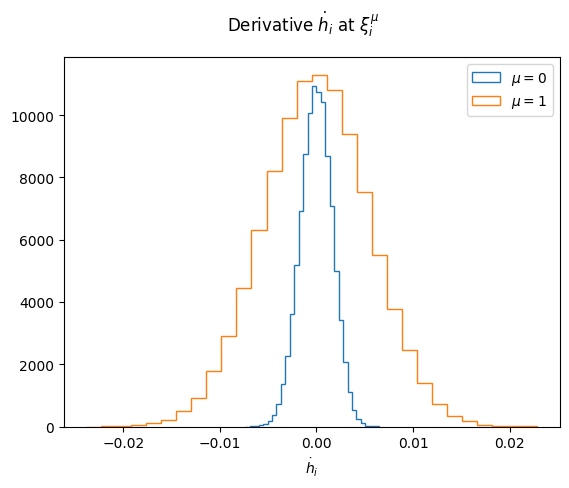

In [53]:
plot_dh_hist(rnn);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:07<00:00]


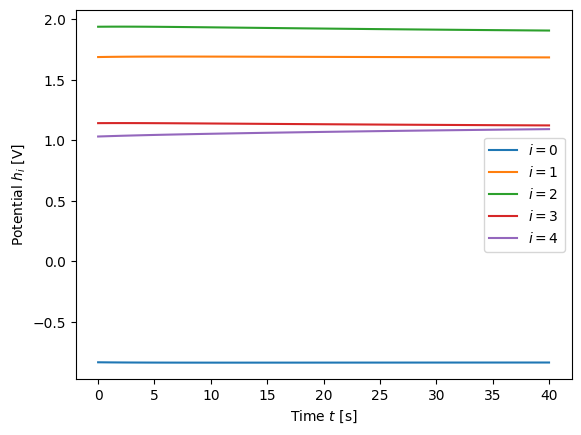

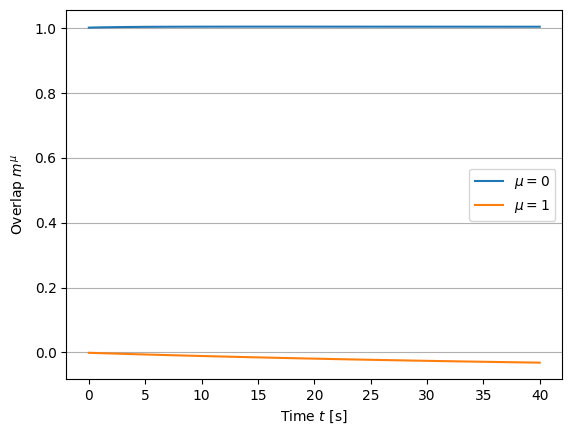

In [9]:
# all neurons in pattern 0
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:09<00:00]


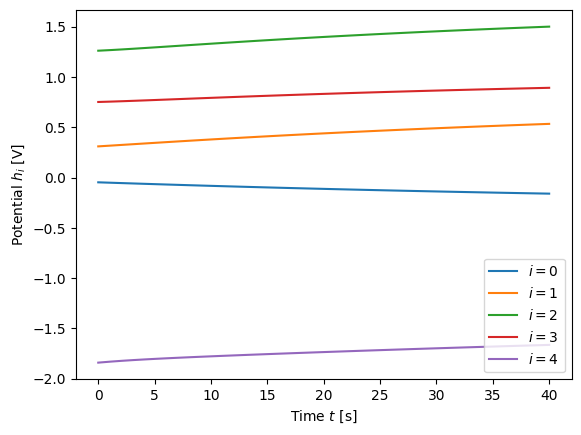

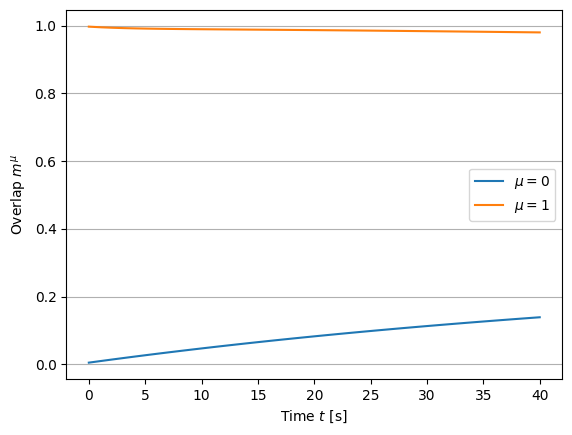

In [8]:
# all neurons in pattern 1
res = rnn.simulate_h(rnn.F[:, 1], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:14<00:00]


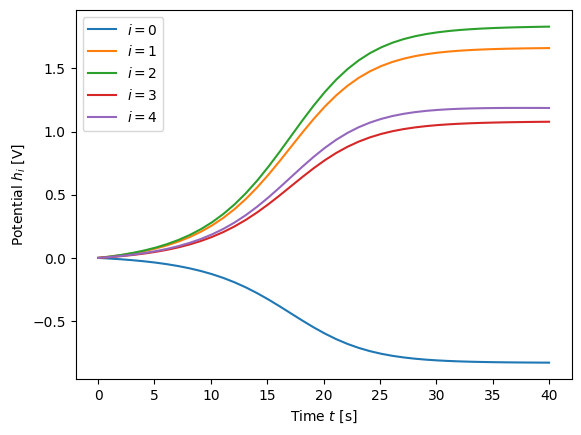

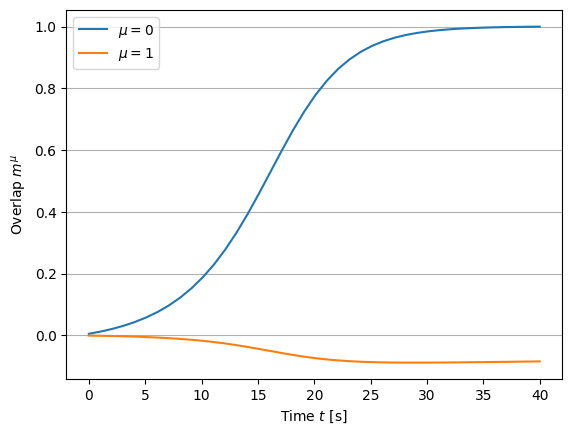

In [7]:
# starting from 0
res = rnn.simulate_h(np.zeros(rnn.N), (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=120.000 of 120 [00:12<00:00]


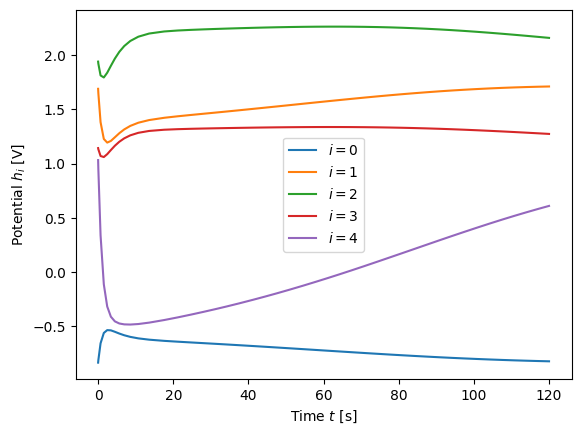

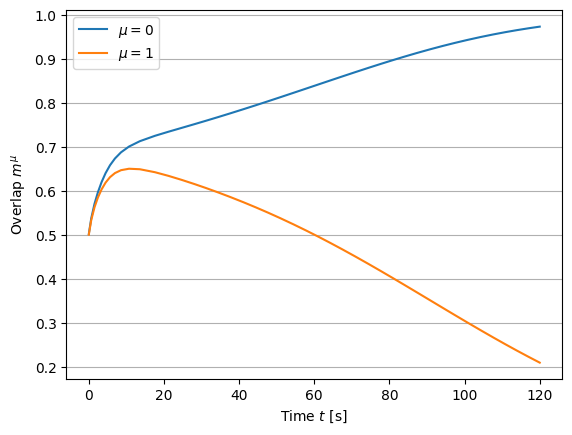

In [11]:
# half neurons in pattern 0, half neurons in pattern 1
res = rnn.simulate_h(np.concatenate([rnn.F[:rnn.N//2, 0], rnn.F[rnn.N//2:, 1]]), (0, 120), dt_max=5, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);
# hypothesis : mu = 0 "wins" because its dh(xi) histogram is a lot tighter